In [56]:
# подключаем библиотеки
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [57]:
# считываем данные
X = pd.read_csv("..\\res\\email_phishing_data.csv")

In [58]:
X.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


Column Details

    num_words - Total number of words in the email body
    num_unique_words- Count of unique words used
    num_stopwords - Count of common stopwords (e.g., "the", "and", "in")
    num_links - Number of hyperlinks detected
    num_unique_domains - Number of unique domains in links (e.g., "paypal.com")
    num_email_addresses - Count of email addresses found in the text
    num_spelling_errors - Count of misspelled words
    num_urgent_keywords - Number of urgent words (e.g., "urgent", "verify", "update")
    label - Target variable: 0 = Safe Email, 1 = Phishing Email

Notes:

    This dataset does not contain raw text or headers, only engineered features for training/testing models.
    Spell checking used pyspellchecker on filtered tokens.
    Stopwords were a fixed English list.
    No personal or PII information is included.



In [59]:
# указываем зависимую переменную
y = X['label']

<Axes: >

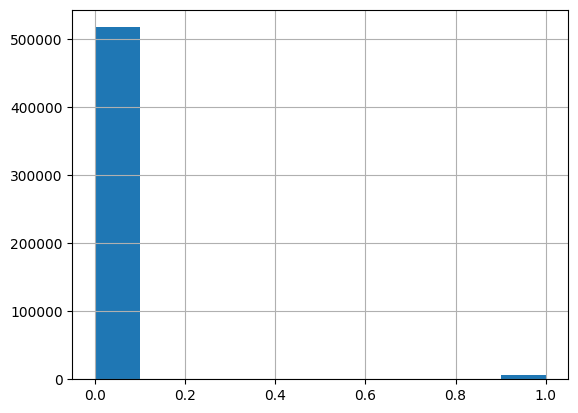

In [60]:
# посмотрим на распеделение значений целевого признака
y.hist()

In [61]:
# посмотрим на первые пять строк данных
X.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [62]:
# посмотрим, как распределены письма в зависимости от наличия каких-либо ссылок
X[["num_links", "label"]].groupby(['num_links'], as_index=False).mean().sort_values(by='label', ascending=False)

,num_links,label
75,75,0.071429
72,72,0.066667
57,57,0.055556
65,65,0.037037
3,3,0.029898
...,...,...
192,252,0.000000
193,269,0.000000
194,275,0.000000
195,539,0.000000


In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


In [64]:
# удаляем из входов зависимую перменную


In [65]:
X.head(10)

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords
0,140,94,52,0,0,0,0,0
1,5,5,1,0,0,0,0,0
2,34,32,15,0,0,0,0,0
3,6,6,2,0,0,0,0,0
4,9,9,2,0,0,0,0,0
5,37,29,5,0,0,3,7,1
6,4,4,1,0,0,0,0,0
7,22,21,4,4,1,0,7,0
8,289,176,66,0,0,3,28,2
9,32,30,9,0,0,0,2,0


In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
dtypes: int64(8)
memory usage: 32.0 MB


In [67]:
from sklearn.model_selection import train_test_split
# Разбиение набора данных на обучающую и тестовую части в соотношении 3:1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Построение дерева решений. max_depth - максимальная глубина дерева
dectree = DecisionTreeClassifier(max_depth=4, random_state=21)
# обучаем на обучающей выборке
dectree.fit(X_train,y_train)
#считаем точность Accuracy на тестовой выборке
dectree.score(X_test,y_test)

0.9871886717678261

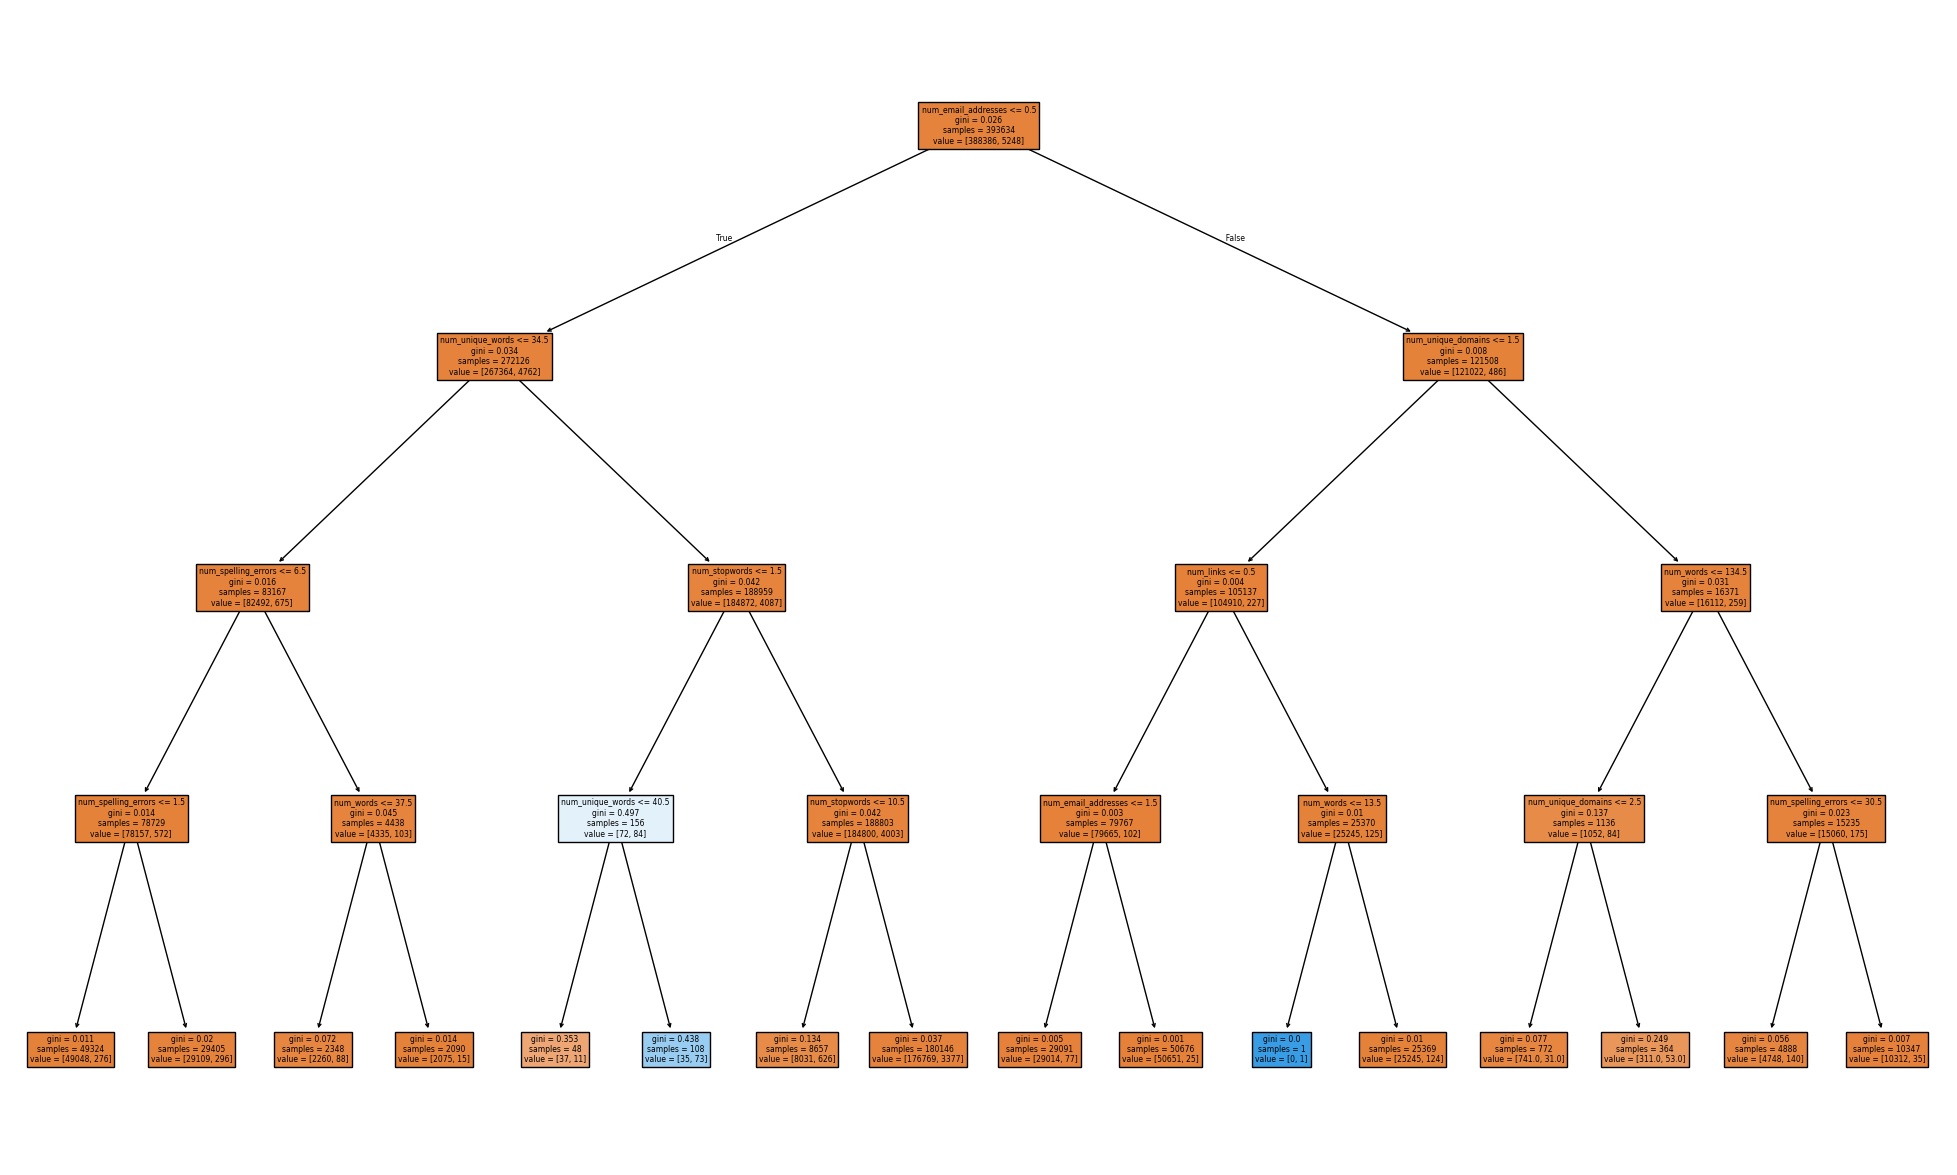

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=((25,15)))
plot_tree(dectree,
          filled=True,
          feature_names=X.columns)
plt.show()

In [79]:
# Построение случайного леса. max_depth - максимальная глубина дерева, n_estimators - количество деревьев
# rfc = RandomForestClassifier(n_estimators = 30,  max_depth=5,  random_state=42)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc.score (X_test, y_test)

0.9898332469591196

In [80]:
# построим матрицу ошибок классификации для случайного леса
y_pred=rfc.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,129407,104
1,1230,471


In [81]:
#посчитаем более объективную метрику f1
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.413884007029877

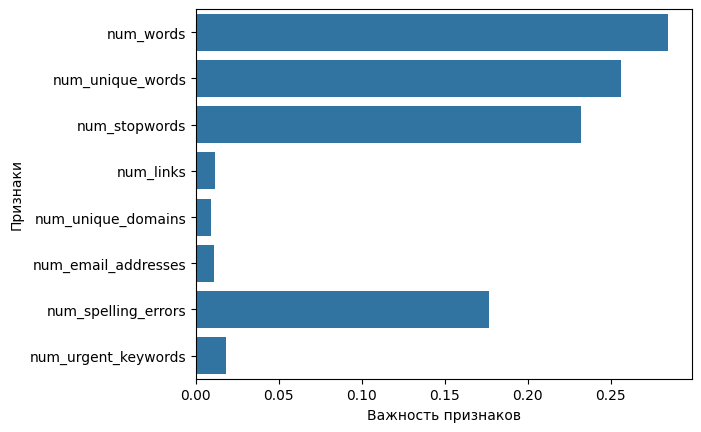

In [82]:
# посмотрим на значимость признаков согласно RandomForest
import seaborn as sns
sns.barplot(x=rfc.feature_importances_, y=X_test.columns)
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.show()

In [83]:
import xgboost as xgb

In [84]:
from xgboost import XGBClassifier
# cl = XGBClassifier(n_estimators = 30, max_depth = 5, random_state=21)
cl = XGBClassifier(random_state=42)
cl.fit(X_train,y_train)
cl.score(X_test, y_test)

0.9884842849739353

In [85]:
# построим матрицу ошибок классификации для градиентного бустинга
y_pred=cl.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,129455,56
1,1455,246


In [86]:
#посчитаем более объективную метрику f1 для градиентного бустинга
f1_score(y_test,y_pred)

0.2456315526709935

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

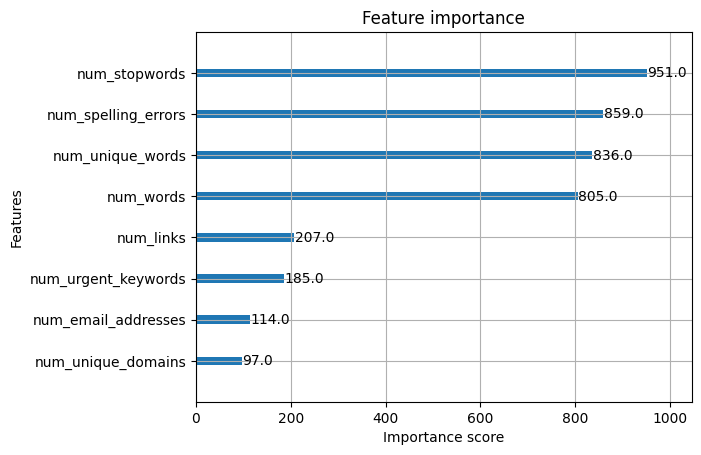

In [87]:
# посмотрим на значимость признаков согласно xgboost
xgb.plot_importance(cl)

In [91]:
dectree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 21,
 'splitter': 'best'}

In [90]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [94]:
cl.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}